## **Problem Statement 1**

Write a Python code to perform the following tasks mentioned:
1.	Load the dataset, check its shape
2.	Rectify the data of the first four columns 
3.	Create new features using the 'Data' feature and the make 'Data' column as index
4.	Handle null and duplicate values 
5.	Check the data type of the features and convert them to the appropriate data type -
6.	Analyze features with outlier values  
7.	Plot and analyze correlation 
8.	Split the dataset for training and testing 
9.	Train a linear regression model and print the intercept and coefficients 
10.	Evaluate the model using R2 score, mean absolute error, and root mean squared error 


Task 1: Loading the dataset and checking its shape

In [ ]:
from google.colab import files #from your local system choose the dataset for analysis
uploaded = files.upload()

Saving Consumo_cerveja.csv to Consumo_cerveja.csv


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/Consumo_cerveja.csv',parse_dates=['Data'])

In [ ]:
df1.shape #Checking shape

(941, 7)

In [ ]:
df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


Task 2: Rectifying the data of the first four columns 

Replace ',' with '.' in columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', and 'Precipitac

In [ ]:
df1['Temperatura Media (C)']=df1['Temperatura Media (C)'].str.replace(',','.')
df1['Temperatura Minima (C)'] = df1['Temperatura Minima (C)'].str.replace(',','.')
df1['Temperatura Maxima (C)'] = df1['Temperatura Maxima (C)'].str.replace(',','.')
df1['Precipitacao (mm)'] = df1['Precipitacao (mm)'].str.replace(',','.')
df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


Task 3: Create new features using the 'Data' feature and the make 'Data' column as index. 
<br>Create new feature 'Month' from the dates, consisting of the month of the year.
<br>Create new feature 'Day' from the dates, consisting of the day of the week.
<br>Set values from 'Data' column as indexes.

In [ ]:
df1['Month']=df1.Data.dt.month
df1['day']=df1.Data.dt.dayofweek

In [ ]:
df1.set_index('Data',inplace=True) #setting Data as index
df1.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,day
Data,,,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1.0,3.0
2015-01-02,27.02,24.5,33.5,0,0.0,28.972,1.0,4.0
2015-01-03,24.82,22.4,29.9,0,1.0,30.814,1.0,5.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
2015-01-05,23.82,21,28.3,0,0.0,28.900,1.0,0.0


Task 4: Handling null and duplicate values 

In [ ]:
print(df1.isnull().sum())
print(df1.shape)

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
Month                          576
day                            576
dtype: int64
(941, 8)


In [ ]:
print(df1.isnull().all(axis=1).sum())  # calculate the number of rows which have null values in all columns

576


In [ ]:
df1.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,day
Data,,,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1.0,3.0
2015-01-02,27.02,24.5,33.5,0,0.0,28.972,1.0,4.0
2015-01-03,24.82,22.4,29.9,0,1.0,30.814,1.0,5.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
2015-01-05,23.82,21,28.3,0,0.0,28.900,1.0,0.0


Dropping the 576 instances having all null values in all columns. So easily drop those instances


In [ ]:
df1.dropna(how='all',inplace=True)

In [ ]:
df1.shape


(365, 8)

In [ ]:
print(df1.isnull().sum())

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
day                            0
dtype: int64


In [ ]:
if df1.duplicated().any():
  print('True: duplicate instances') 
else: 
  print('False: No duplicate instances')

False: No duplicate instances


Task 5: Checking the data type of the features and convert them to the appropriate data type 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    object 
 1   Temperatura Minima (C)       365 non-null    object 
 2   Temperatura Maxima (C)       365 non-null    object 
 3   Precipitacao (mm)            365 non-null    object 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   day                          365 non-null    float64
dtypes: float64(4), object(4)
memory usage: 25.7+ KB


In [ ]:
df1['Temperatura Media (C)']=df1[['Temperatura Media (C)']].astype(float)
df1['Temperatura Minima (C)'] = df1['Temperatura Minima (C)'].astype(float)
df1['Temperatura Maxima (C)'] = df1['Temperatura Maxima (C)'].astype(float)
df1['Precipitacao (mm)'] = df1['Precipitacao (mm)'].astype(float)
# Final de semana is a categorical column(like yes or no) so it should be int, not float
df1['Final de Semana'] = df1['Final de Semana'].astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int64  
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   day                          365 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 25.7 KB


In [ ]:
df1.describe() #get a summary to check results and changes in dataset

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027,3.0
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584,2.0
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,0.0
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000,1.0
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,3.0
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000,5.0
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,6.0


Task 6: Analyzing features with outlier values  

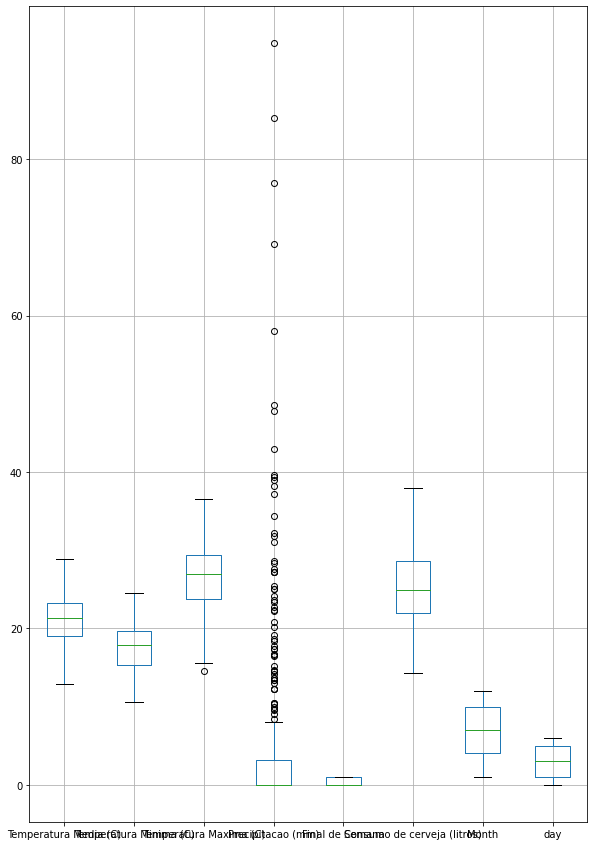

In [ ]:
import matplotlib.pyplot as plt 
df1.boxplot(figsize=(10,15)) #Check for outlier in all the columns using boxplot
plt.show()

Column 'Precipitacio' seems to have lots of outlier. Let's try to understand this using the distribution of the data

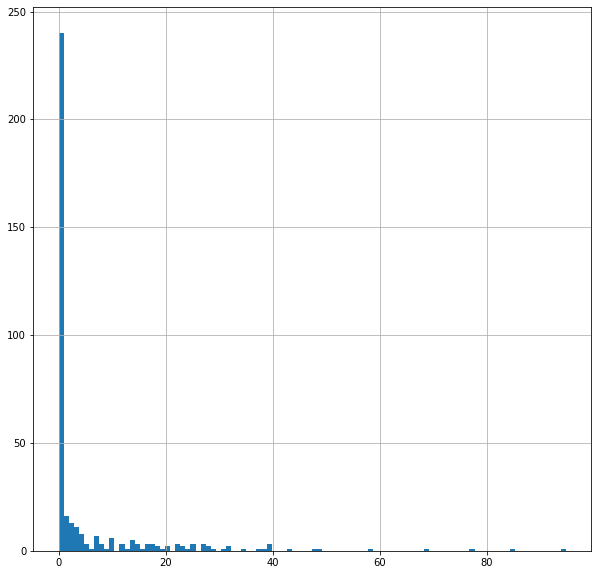

In [ ]:
df1['Precipitacao (mm)'].hist(bins=100,figsize=(10,10))
plt.show()

In [ ]:
print(df1['Precipitacao (mm)'][df1['Precipitacao (mm)']==0].value_counts())

0.0    218
Name: Precipitacao (mm), dtype: int64


We can see out of 365, 218 values are 0.
<br>We can see how the data is mostly skewed thus having so many outliers. It can also be possible that the values with 0 percipitation are the instance where
percipitation was not recorded. Lets clip all the values over 40 in column 'Precipitacao (mm)' to 40.

In [ ]:
import numpy as np
df1['Precipitacao (mm)'] = np.clip(df1['Precipitacao (mm)'], 0, 40)

Task 7: Plot and analyze the correlation 

Plot the correlation between features and
Analyze the correlation of independent features with respect to dependent feature

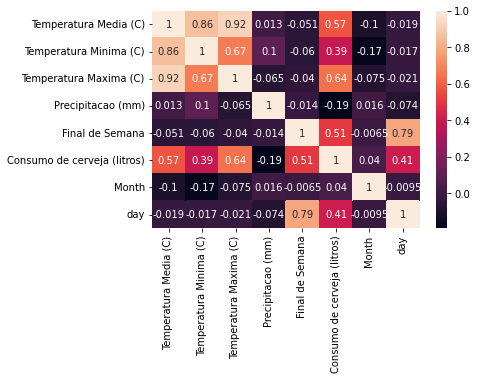

In [ ]:
import seaborn as sns
correlation = df1.corr()
sns.heatmap(correlation, annot = True)

All the features are showing a high correlation with the output feature except the 'Month' feature. In the case of the 'Precipitacao (mm)' feature, which has lots of
values as 0, still, it is showing quite good correlation, and hence it will be kept.

Task 8: Split the dataset for training and testing 

In [ ]:
from sklearn.model_selection import train_test_split
X= df1.drop(columns=['Consumo de cerveja (litros)'],axis=1)
y= df1['Consumo de cerveja (litros)']
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 7)
(73, 7)
(292,)
(73,)


Task 9: Train a linear regression model and print the intercept and coefficients 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print('The final coefficients after training is:',lr.coef_)
print('The final intercept after training is:',lr.intercept_)

The final coefficients after training is: [-1.34341349e-01  1.22055186e-01  7.03305117e-01 -5.80658209e-02
  5.24988993e+00  1.36610989e-01  2.42604471e-03]
The final intercept after training is: 5.299119057068431


Task 10: Evaluate the model using the R2 score, mean absolute error, and root mean squared error 

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
y_pred = lr.predict(X_test)
print("r2 score of our model is:", r2_score(y_test,y_pred))
print("mean absolute error of our model is:", mean_absolute_error(y_test,y_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,y_pred,squared=False))

r2 score of our model is: 0.669212588357504
mean absolute error of our model is: 2.0233917644808717
root mean squared error of our model is: 2.4737414676598473


# Problem Statement 2

Write a Python code to perform the following tasks mentioned:
1.	Load the data, check its shape and check for null values 
2.	Split the dataset for training and testing - 1000 instances for testing
3.	Train the model using sklearn (Apply linear regression to train a model for prediction)
4.	Predict the prices on test data and evaluate the model by r2 score and mean absolute error
5.	Find coefficient and intercept using the trained model


Task 1: Load the data, check its shape and check for null values 

In [ ]:
from google.colab import files #from your local system choose the dataset for analysis
uploaded = files.upload()

Saving california_housing_train.csv to california_housing_train.csv


In [ ]:
import pandas as pd
df2 = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(df2.isnull().sum())
print(df2.shape) #check shape

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
(17000, 9)


Task 2: Spliting the dataset for training (80%) and testing (20%) - 1000 instances for testing

In [ ]:
X_train=df2.iloc[:-1000,:-1]
y_train=df2.iloc[:-1000,-1]
X_test = df2.iloc[-1000:, :-1]
y_test = df2.iloc[-1000:,-1]
print('Shape of X_train is:', X_train.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of y_test is:', y_test.shape)

Shape of X_train is: (16000, 8)
Shape of y_train is: (16000,)
Shape of X_test is: (1000, 8)
Shape of y_test is: (1000,)


Task 3: Training the model using sklearn 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Task 4: Predicting the prices on test data and evaluate the model

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = lr.predict(X_test)
print('Predictions for test data:', y_pred[:5])
print("r2 score of our model is:", r2_score(y_test,y_pred))
print("mean absolute error of our model is:", mean_absolute_error(y_test,y_pred))

Predictions for test data: [147162.8573019  225302.65308351 152796.4573683  308870.26419818
 283483.75481794]
r2 score of our model is: 0.6777386734175752
mean absolute error of our model is: 53606.950938384194


Task 5: Finding coefficient and intercept using the trained model

In [ ]:
print('The final intercept after training is:',lr.intercept_)
print('The coefficient is: ',lr.coef_)

The final intercept after training is: -3520006.3058233857
The coefficient is:  [-4.20851753e+04 -4.20954131e+04  1.03051140e+03 -8.79478522e+00
  1.21229265e+02 -3.75749690e+01  3.92433254e+01  4.04064982e+04]


# Problem Statement 3

Write a Python code to perform the following tasks mentioned:
1.	Load the data, check its shape and check for null values 
2.	Convert categorical features to numerical values (Use One-Hot Encoding)
3.	Split the dataset for training and testing  
4.	Train the model using sklearn – Linear Regression
5.	Find the intercept and coefficient from the trained model 
6.	Predict the prices of test data and evaluate the model using calculate r2 score and root mean squared error 


Task 1: Loading the data, check its shape and check for null values 

In [ ]:
from google.colab import files #from your local system choose the dataset for analysis
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
df3=pd.read_csv('/content/insurance.csv')
print(df3.head())
df3.shape
df3.isnull().sum()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Task 2: Converting categorical features to numerical values Using OHE

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
d=df3.select_dtypes(include=[object])
encoded_labels = ohe.fit_transform(d).toarray()

df_encoded=pd.DataFrame(encoded_labels)
df3.drop(columns=['sex','smoker','region'],inplace=True)
df_new = pd.concat([df_encoded,df3], ignore_index=True,axis=1)

In [ ]:
df_new

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19,27.900,0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,33.770,1,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28,33.000,3,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33,22.705,0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50,30.970,3,10600.54830
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18,31.920,0,2205.98080
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18,36.850,0,1629.83350
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21,25.800,0,2007.94500


Task 3: Spliting the dataset for training and testing  

In [ ]:
X=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state = 7)
print(X_train.shape)
print(X_test.shape)

(1003, 11)
(335, 11)


Task 4: Train the model using sklearn – Linear Regression

In [ ]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

Task 5: Finding the intercept and coefficient from the trained model 

In [ ]:
print('The final coefficients after training is:',lr.coef_)
print('The final intercept after training is:',lr.intercept_)

The final coefficients after training is: [-4.20851753e+04 -4.20954131e+04  1.03051140e+03 -8.79478522e+00
  1.21229265e+02 -3.75749690e+01  3.92433254e+01  4.04064982e+04]
The final intercept after training is: -3520006.3058233857


Task 6: Predicting the prices of test data and evaluate the model using calculate r2 score and root mean squared error 

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = regr.predict(X_test)
print('Predictions for test data:', y_pred[:5])
print("r2 score of our model is:", r2_score(y_test,y_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,y_pred,squared=False))

Predictions for test data: [15248.874306   11126.97945225 -2048.68105088 29282.63519248
  9070.8295246 ]
r2 score of our model is: 0.7509741262661105
root mean squared error of our model is: 6080.97796761699


# Problem Statement 4

Write a Python code to perform the following tasks mentioned:
1.	Load the data, check its shape and check for null values
2.	Convert categorical features to numerical values using Label Encoder
3.	Split the dataset for training and testing 
4.	Train the model using sklearn (linear regression), also find the intercept and coefficient from the trained model 
5.	Predict the profits of test data and evaluate the model using r2 score and mean squared error
6.	Regularize the model using Ridge Regression and find the Score 
7.	Regularize the model using Lasso Regression and find the Score 


In [1]:
from google.colab import files #from your local system choose the dataset for analysis
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


Task 1: Loading the data, check its shape and check for null values

In [2]:
import pandas as pd
df = pd.read_csv('/content/50_Startups.csv')
print(df.isnull().sum())
print(df.head())
print(df.shape)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
(50, 5)


Task 2: Converting categorical features to numerical values 

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #sname of states are converted into numerical labels
df['State']=le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


Task 3: Spliting dataset for training and testing

In [4]:
from sklearn.model_selection import train_test_split
X= df.iloc[:,:-1]
y= df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 4)
(10, 4)
(40,)
(10,)


Task 4: Training the model using sklearn (linear regression), also find the intercept and coefficient from the trained model 

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print('The final coefficients after training is:',lr.coef_)
print('The final intercept after training is:',lr.intercept_)

The final coefficients after training is: [ 7.73632191e-01 -9.41863371e-03  2.93451013e-02  1.73159640e+02]
The final intercept after training is: 49637.34362243092


Task 5: Predicting the profits of test data and evaluate the model using r2 score and mean squared error

In [6]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = lr.predict(X_test)
print("r2 score of our model is:", r2_score(y_test,y_pred))
print("mean absolute error of our model is:", mean_squared_error(y_test,y_pred,squared=False))

r2 score of our model is: 0.9649827631091706
mean absolute error of our model is: 8913.354557987737


Task 6: Regularizing the model using Ridge Regression and find the Score 

In [7]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridgeReg = Ridge(alpha=0.0005, normalize=True) 
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)
score = ridgeReg.score(X_test,y_test)
score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


0.9648637587691529

Task 7: Regularizing the model using Lasso Regression and find the Score 

In [8]:
lassoReg = Lasso(alpha=0.03)
lassoReg.fit(X_train,y_train)
pred = lassoReg.predict(X_test)
score=lassoReg.score(X_test,y_test)
score

0.9649828004576063